### Import necessary packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)  # or 1000
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline, Pipeline
from imblearn.under_sampling import NearMiss

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

### Import Dataset

In [2]:
data = pd.read_csv(r'C:\Users\user\Desktop\sentiment\BankCustomerChurn_Dataset.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.shape

(10000, 14)

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [13]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
data.describe(exclude='number')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


### EDA - Exploratory Data Analysis

In [14]:
def age_group(age):
    if age <=30:
        return 'age_group (18-30)'
    elif ((age >30) & (age<=45)):
        return 'age_group (31-45)'
    elif ((age >45) & (age<=60)):
        return 'age_group (46-60)'
    elif ((age >61) & (age<=75)):
        return 'age_group (61-75)'
    else:
        return 'age_group (75+)'
    

def active(cust):
    if cust ==0:
        return 'Inactive'
    else:
        return 'Active'

In [30]:
data['age_group'] = data.Age.apply(age_group)
data['active_mem'] = data.IsActiveMember.apply(active)

In [16]:
gender_churn = data.groupby(['Gender','Exited'])[['Exited']].size()
gender_per_churn = gender_churn.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()
gender_per_churn.columns = ['Gender','Exited','Percent']

country_churn = data.groupby(['Geography','Exited']).size().reset_index()
country_churn.columns = ['Geography','Exited','count']

product_churn = data.groupby(['NumOfProducts','Exited']).size().reset_index()
product_churn.columns = ['Products','Exited','count']

tenure_churn = data.groupby(['Tenure','Exited']).size()
tenure_churn.columns = ['Tenure','Exited','count']
tenure_churn_per = tenure_churn.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()
tenure_churn_per.columns = ['Tenure','Exited','percent']

balance_churn = data.groupby(['Balance','Exited']).size()
balance_churn_per = balance_churn.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()
balance_churn_per.columns = ['Balance','Exited','percent']

cust_age = data.groupby(['age_group','Exited']).size()
churn_perc = cust_age.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()
churn_perc.columns = ['age_group','Exited','churn_percent']

active_member = data.groupby(['active_mem','Exited']).size()
active_churn = active_member.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()
active_churn.columns = ['active_mem','Exited','percent']


In [19]:
churn_rate = (data['Exited'].sum()*100/len(data))

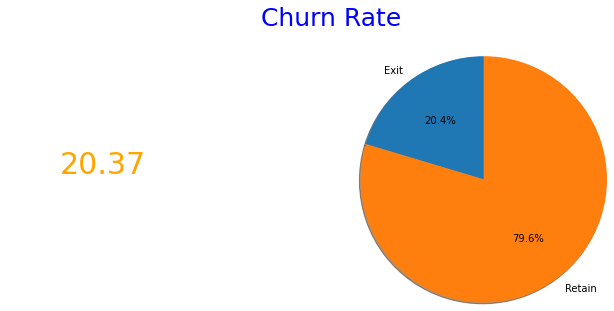

In [20]:
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
value = churn_rate # replace with your actual value

ax1.text(0.5, 0.5, f"{value:,}", fontsize=30, ha="center", va="bottom",color = 'orange')
ax1.axis('off')

sizes = [data.Exited[data['Exited']== 1].count(), data.Exited[data['Exited']==0].count()]
ax2.pie(sizes,labels=['Exit','Retain'],autopct='%1.1f%%',shadow=True, startangle=90,radius=2.0)

plt.tight_layout(pad=3.6,w_pad=6.0,h_pad=5.0,)
plt.subplots_adjust(wspace=1.0)
fig.suptitle('Churn Rate',fontsize=25,color='blue')

plt.show()

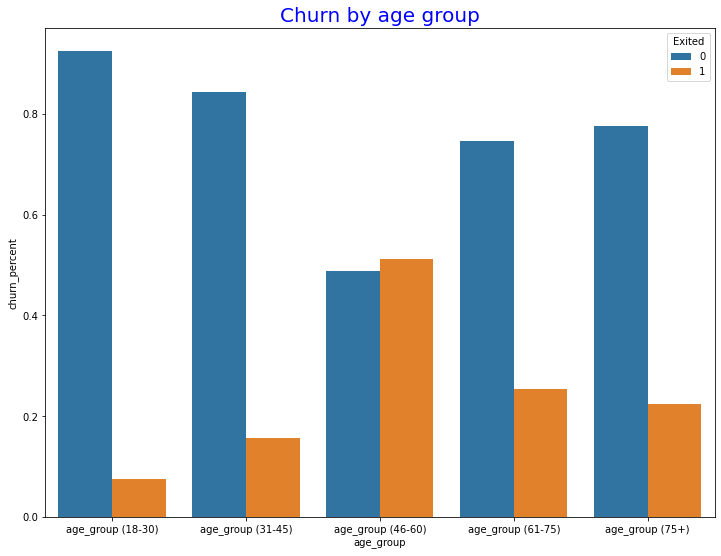

In [32]:
plt.figure(figsize=(12,9))
sns.barplot(data=churn_perc,x='age_group',y='churn_percent',hue='Exited')
plt.title('Churn by age group',fontsize=20,color='blue')
plt.show()

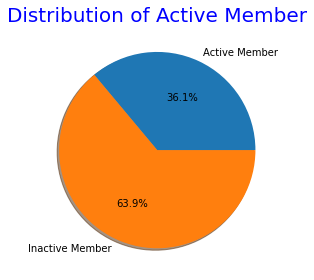

In [57]:
active_churn = data[(data['active_mem']=='Active') & (data['Exited']==1)].shape[0]
inactive_churn = data[(data['active_mem']=='Inactive') & (data['Exited']==1)].shape[0]
cust = [active_churn,inactive_churn]


plt.pie(cust,labels=['Active Member','Inactive Member'],autopct='%1.1f%%',shadow=True,radius=1.0,center=(0,1))
plt.title('Distribution of Active Member',fontsize=20,color='blue')
plt.tight_layout()

In [21]:
crdit_churn = data[(data['HasCrCard']==1) & (data['Exited']==1)].shape[0]
non_cred_churn = data[(data['HasCrCard']==0) & (data['Exited']==1)].shape[0]

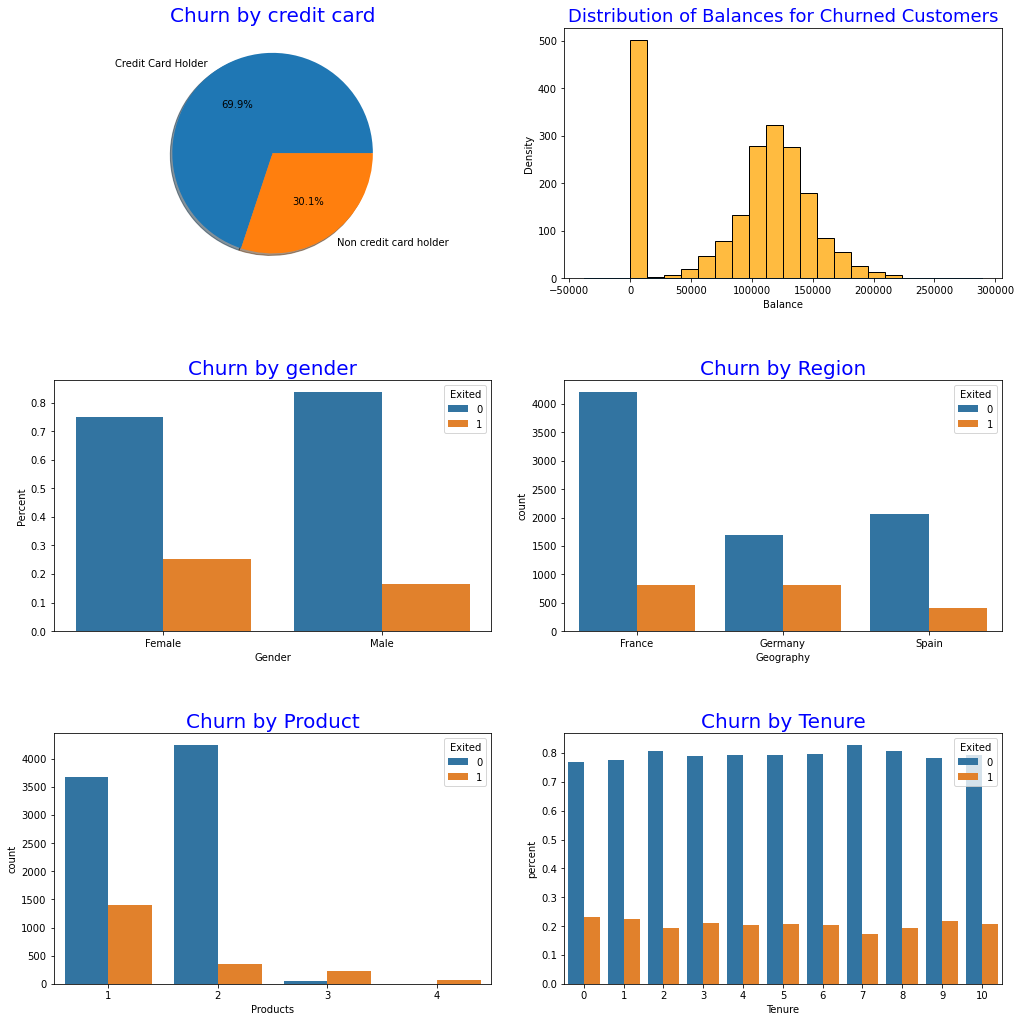

In [22]:
fig,axes = plt.subplots(nrows=3,ncols=2,sharex=False,sharey=False,figsize=(15,15))


size = [crdit_churn,non_cred_churn]
axes[0,0].pie(size,labels=['Credit Card Holder','Non credit card holder'],autopct='%1.1f%%',shadow=True,radius=1.0)
axes[0,0].set_title('Churn by credit card',fontsize = 20,color='blue')

churned_balances = data.loc[data['Exited'] == 1, 'Balance']

# Plot the histogram
sns.kdeplot(churned_balances, shade=True,ax=axes[0,1])
sns.histplot(churned_balances, kde=False, color="orange",ax=axes[0,1])
axes[0,1].set_title("Distribution of Balances for Churned Customers",color='blue',fontsize=18)
axes[0,1].set_xlabel("Balance")
axes[0,1].set_ylabel("Density")


sns.barplot(data=gender_per_churn,x='Gender',y='Percent',hue='Exited',ax=axes[1,0])
axes[1,0].set_title('Churn by gender',fontsize = 20,color='blue')

sns.barplot(data=country_churn,x='Geography',y='count',hue='Exited',ax=axes[1,1])
axes[1,1].set_title('Churn by Region',fontsize = 20,color='blue')

sns.barplot(data=product_churn,x='Products',y='count',hue='Exited',ax=axes[2,0])
axes[2,0].set_title('Churn by Product',fontsize = 20,color='blue')

sns.barplot(data=tenure_churn_per,x='Tenure',y='percent',hue='Exited',ax=axes[2,1])
axes[2,1].set_title('Churn by Tenure',fontsize = 20,color='blue')


plt.tight_layout(pad=3.6,w_pad=2.6,h_pad=5.0,)
plt.show()

In [23]:
corr_val = np.abs(data.corrwith(data['Exited']))
corr_val

CreditScore        0.027094
Age                0.285323
Tenure             0.014001
Balance            0.118533
NumOfProducts      0.047820
HasCrCard          0.007138
IsActiveMember     0.156128
EstimatedSalary    0.012097
Exited             1.000000
dtype: float64

### Encoding Categorical variable

In [24]:
data = pd.get_dummies(data,drop_first=True)

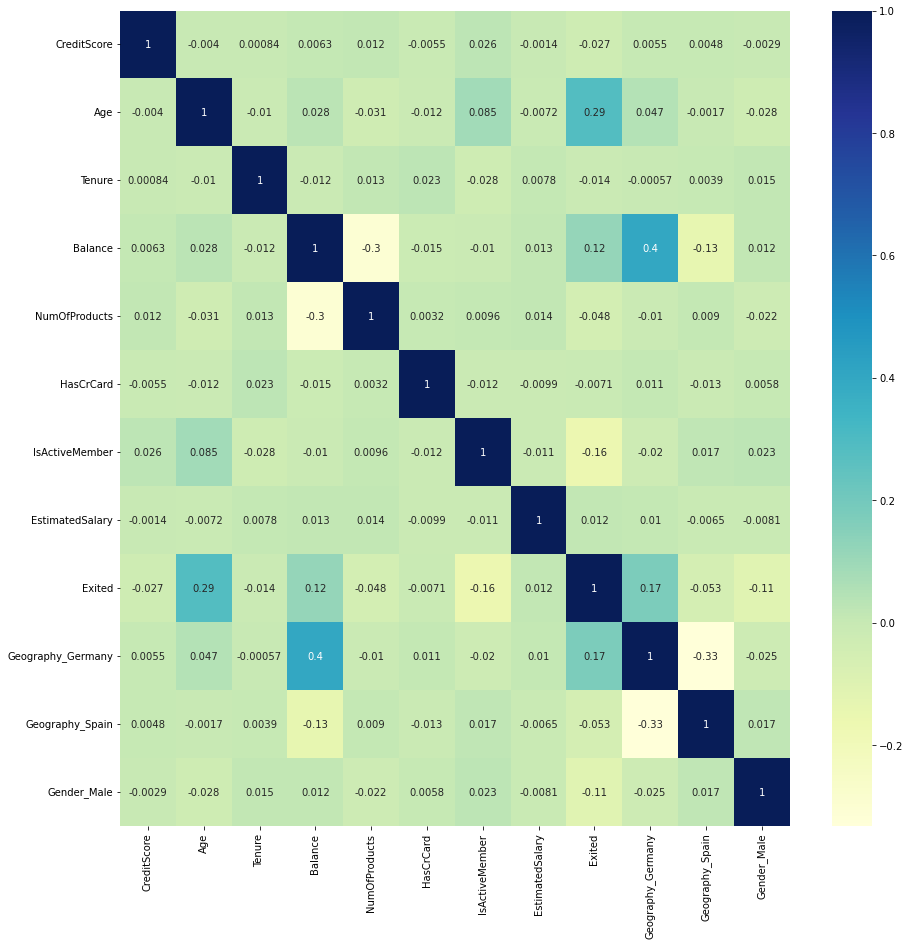

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

plt.show()

### Splitting dataset :

#### Feature (x) and target (y)

In [26]:
x= data[data.columns.difference(['Exited'])]
y = data['Exited']

In [27]:
print('shape of x:',x.shape)
print('shape of y:',y.shape)

shape of x: (10000, 11)
shape of y: (10000,)


####  Test and Train

In [29]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=123)

In [30]:
print('shape of train_x:',train_x.shape)
print('shape of train_y:',train_y.shape)
print('shape of test_x:',test_x.shape)
print('shape of test_y:',test_y.shape)

shape of train_x: (7000, 11)
shape of train_y: (7000,)
shape of test_x: (3000, 11)
shape of test_y: (3000,)


### Resampling

In [31]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [32]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [33]:
x_res

,Age,Balance,CreditScore,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,42,0.000000,619,101348.880000,0,0,0,1,1,1,2
1,41,83807.860000,608,112542.580000,0,0,1,0,1,1,1
2,42,159660.800000,502,113931.570000,0,0,0,1,0,3,8
3,39,0.000000,699,93826.630000,0,0,0,0,0,2,1
4,43,125510.820000,850,79084.100000,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
15921,41,0.000000,554,197941.001251,0,0,0,0,0,1,2
15922,38,98380.084072,770,97066.888044,0,0,0,1,0,1,3
15923,43,74777.525174,667,25792.750016,0,0,0,0,0,1,7
15924,48,114873.914013,667,153452.936452,0,1,0,1,0,1,6


In [34]:
train_x,test_x,train_y,test_y = train_test_split(x_res,y_res,test_size=0.3,random_state=123)

In [35]:
train_x.shape

(11148, 11)

In [36]:
train_y.shape

(11148,)

In [37]:
test_x

,Age,Balance,CreditScore,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
8117,34,0.00000,624,582.590000,0,0,1,1,0,1,6
8265,40,140306.38000,618,160618.610000,0,1,0,1,0,1,0
5455,45,116585.97000,805,189428.750000,0,1,0,1,0,1,9
10787,41,142756.51445,719,185839.429505,0,0,0,0,0,2,3
337,33,0.00000,649,2010.980000,1,0,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
6625,41,112119.48000,657,17536.820000,0,0,1,1,0,1,6
9921,36,65349.71000,757,64539.640000,1,1,0,0,0,1,1
2141,18,0.00000,674,55753.120000,1,0,0,1,1,2,7
3214,33,68193.72000,572,19998.310000,1,0,0,1,0,1,9


### Feature scaling

In [38]:
sc=StandardScaler()

In [39]:
st= sc.fit(train_x)

In [40]:
train_x_std = pd.DataFrame(st.transform(train_x),columns=train_x.columns)
test_x_std = pd.DataFrame(st.transform(test_x),columns=test_x.columns)
test_x_std

,Age,Balance,CreditScore,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,-0.691154,-1.341091,-0.257287,-1.726898,-0.841572,-0.569754,2.175229,0.774374,-0.767867,-0.734350,0.434327
1,-0.089249,0.951751,-0.322694,1.042344,-0.841572,1.755143,-0.459722,0.774374,-0.767867,-0.734350,-1.775400
2,0.412338,0.564120,1.715842,1.540871,-0.841572,1.755143,-0.459722,0.774374,-0.767867,-0.734350,1.539191
3,0.011068,0.991791,0.778334,1.478762,-0.841572,-0.569754,-0.459722,-1.291365,-0.767867,1.018655,-0.670537
4,-0.791471,-1.341091,0.015245,-1.702181,1.188252,-0.569754,-0.459722,0.774374,-0.767867,1.018655,-1.038824
...,...,...,...,...,...,...,...,...,...,...,...
4773,0.011068,0.491130,0.102455,-1.433524,-0.841572,-0.569754,2.175229,0.774374,-0.767867,-0.734350,0.434327
4774,-0.490519,-0.273167,1.192582,-0.620194,1.188252,1.755143,-0.459722,-1.291365,-0.767867,-0.734350,-1.407112
4775,-2.296232,-1.341091,0.287777,-0.772234,1.188252,-0.569754,-0.459722,0.774374,1.302309,1.018655,0.802615
4776,-0.791471,-0.226691,-0.824152,-1.390931,1.188252,-0.569754,-0.459722,0.774374,-0.767867,-0.734350,1.539191


### Model Building

In [41]:
def metric_table(y_true,y_pred,y_proba,model_name):
    prec = precision_score(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    roc = roc_auc_score(y_true,y_proba[:, 1])
    metric = pd.DataFrame(data={
        "model" : model_name,
        "Precision" : prec,
        "Accuracy" : acc,
        "Recall" : recall,
        "F1-score" : f1,
        "ROC_AUC" : roc
    },index=[0])
    return metric

In [42]:
def roc_curve_plot(Y_pred, Y_true, Y_pred_pobablities, model_name):
    Y_pp = Y_pred_pobablities[:, 1]
    fpr, tpr, threshold1 = roc_curve(Y_true, Y_pp )
    
    fig, ax = plt.subplots(nrows=1, ncols= 1, figsize = (7,5), constrained_layout = True)
    ax.plot(fpr, tpr, label='ROC Score: {:.5f}'.format(roc_auc_score(Y_true, Y_pp)),color='Red')
    ax.set_title(f"{model_name} ROC Curve ", fontdict = {"fontsize": 18})
    ax.set_xlabel("False Positive Rate", fontdict = {"fontsize": 15} )
    ax.set_ylabel("True Positive Rate", fontdict = {"fontsize": 15})
    ax.legend(loc = 4, fontsize = 14 )

    plt.show()

#### Logistic Regression

In [43]:
import copy
train_x_lr = copy.deepcopy(train_x_std)
test_x_lr = copy.deepcopy(test_x_std)

In [44]:
lr=LogisticRegression()

lr_model = lr.fit(train_x_lr,train_y)

In [45]:
lr_pred = lr_model.predict(test_x_lr)
lr_prob = lr_model.predict_proba(test_x_lr)

In [46]:
metric_table(test_y,lr_pred,lr_prob,'LogisticRegression')

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,LogisticRegression,0.767997,0.776476,0.787431,0.777593,0.85802


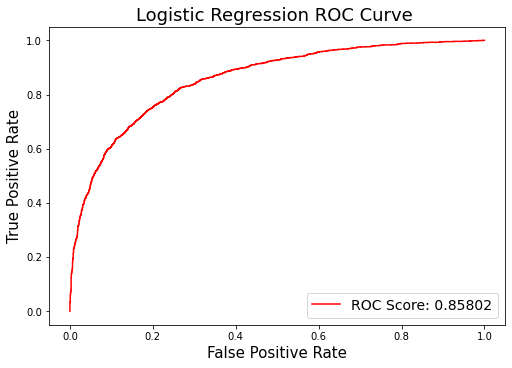

In [47]:
roc_curve_plot(lr_pred,test_y,lr_prob,"Logistic Regression")

### K-nearest neighbour

In [48]:
train_x_knn = copy.deepcopy(train_x_std)
test_x_knn = copy.deepcopy(test_x_std)

In [49]:
knn= KNeighborsClassifier()

In [50]:
knn_model = knn.fit(train_x_knn,train_y)

In [51]:
knn_pred = knn_model.predict(test_x_knn)
knn_prob = knn_model.predict_proba(test_x_knn)

In [52]:
metric_table(test_y,knn_pred,knn_prob,"KNN")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,KNN,0.796652,0.807869,0.82286,0.809544,0.881467


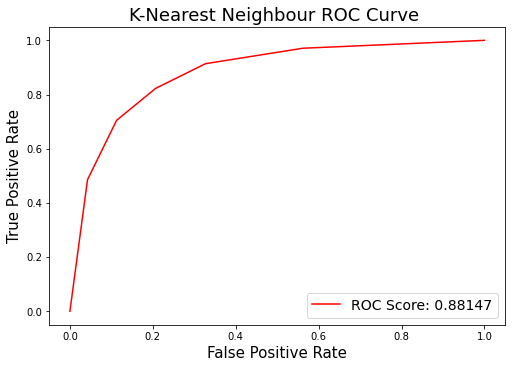

In [53]:
roc_curve_plot(knn_pred,test_y,knn_prob,"K-Nearest Neighbour")

### SVC

In [54]:
train_x_svc = copy.deepcopy(train_x_std)
test_x_svc = copy.deepcopy(test_x_std)

In [55]:
svc = SVC(probability=True)

In [56]:
svc_model = svc.fit(train_x_svc,train_y)

In [57]:
svc_pred = svc_model.predict(test_x_svc)
svc_prob = svc_model.predict_proba(test_x_svc)

In [58]:
metric_table(test_y,svc_pred,svc_prob,"SVC")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,SVC,0.830789,0.830264,0.826234,0.828505,0.910936


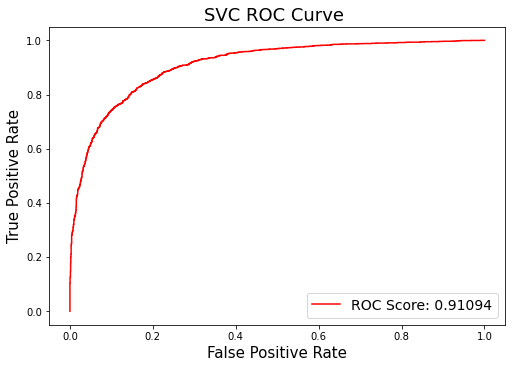

In [59]:
roc_curve_plot(svc_pred,test_y,svc_prob,"SVC")

### Decision Tree Classifier

In [60]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(train_x_std,train_y)

In [61]:
dt_pred = dt_model.predict(test_x_std)
dt_prob = dt_model.predict_proba(test_x_std)

In [62]:
metric_table(test_y,dt_pred,dt_prob,"Decision Tree Classifier")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,Decision Tree Classifier,0.77943,0.78694,0.795867,0.787563,0.787007


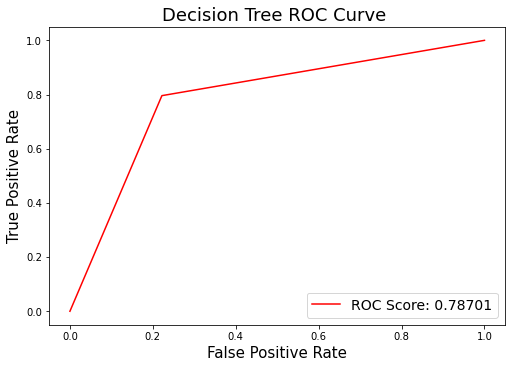

In [63]:
roc_curve_plot(dt_pred,test_y,dt_prob,"Decision Tree")

### Random Forest

In [64]:
rf = RandomForestClassifier()
rf_model = rf.fit(train_x_std,train_y)

In [65]:
rf_pred= rf_model.predict(test_x_std)
rf_prob = rf_model.predict_proba(test_x_std)

In [66]:
metric_table(rf_pred,test_y,rf_prob,"Random Forest")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,Random Forest,0.859553,0.857472,0.854149,0.856843,1.0


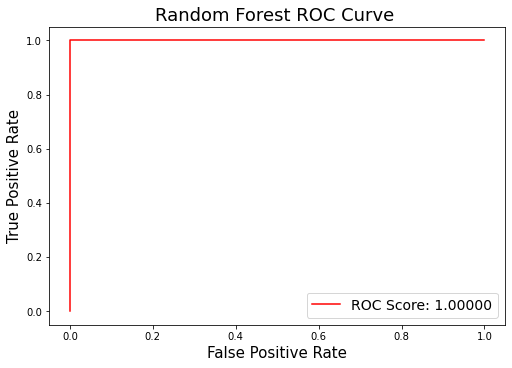

In [67]:
roc_curve_plot(test_y,rf_pred,rf_prob,"Random Forest")

### Gradient Boosting

In [68]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(train_x_std,train_y)

In [69]:
gb_pred = gb_model.predict(test_x_std)
gb_prob = gb_model.predict_proba(test_x_std)

In [70]:
metric_table(test_y,gb_pred,gb_prob,"Gradient Boosting")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,Gradient Boosting,0.832058,0.830682,0.82539,0.828711,0.915918


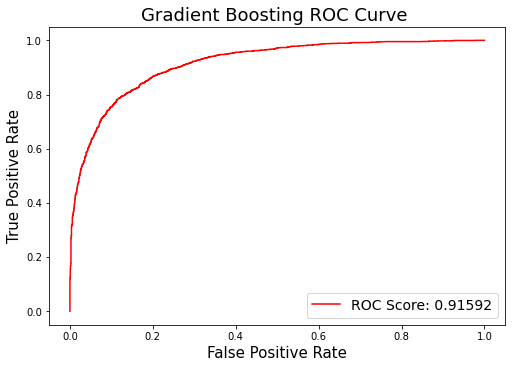

In [71]:
roc_curve_plot(gb_pred,test_y,gb_prob,"Gradient Boosting")

### XGBoost

In [72]:
xg = XGBClassifier()
xgb_model = xg.fit(train_x_std,train_y)

In [73]:
xgb_pred = xgb_model.predict(test_x_std)
xgb_prob = xgb_model.predict_proba(test_x_std)

In [74]:
metric_table(test_y,xgb_pred,xgb_prob,"XGBoost")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,XGBoost,0.853372,0.856844,0.859131,0.856242,0.9356


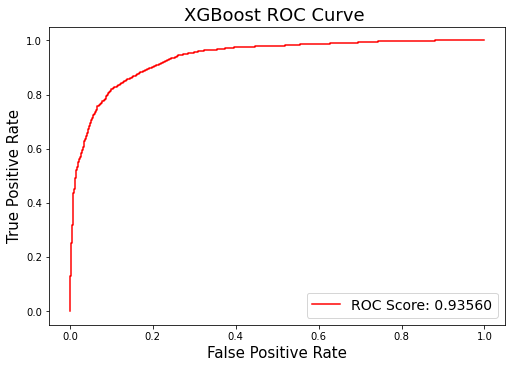

In [75]:
roc_curve_plot(xgb_pred,test_y,xgb_prob,"XGBoost")

In [76]:
def roc_summary_plot(Y_true, Y_probability = [], model_name = []):
    for i in range(len(Y_probability)):
        
        fpr, tpr, threshold1 = roc_curve(Y_true,Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("ROC scores summary (tuned model)", fontsize = 18)
        plt.xlabel("False Positive Rate" , fontdict = {"fontsize": 15})
        plt.ylabel("True Positive Rate" , fontdict = {"fontsize": 15})
        plt.plot(fpr, tpr, label='{0} ROC Score: {1}'.format(model_name[i] ,round(roc_auc_score(Y_true, Y_probability[i][:,1] ) ,2)))
        plt.legend(loc = 4, fontsize =13)
    plt.show()

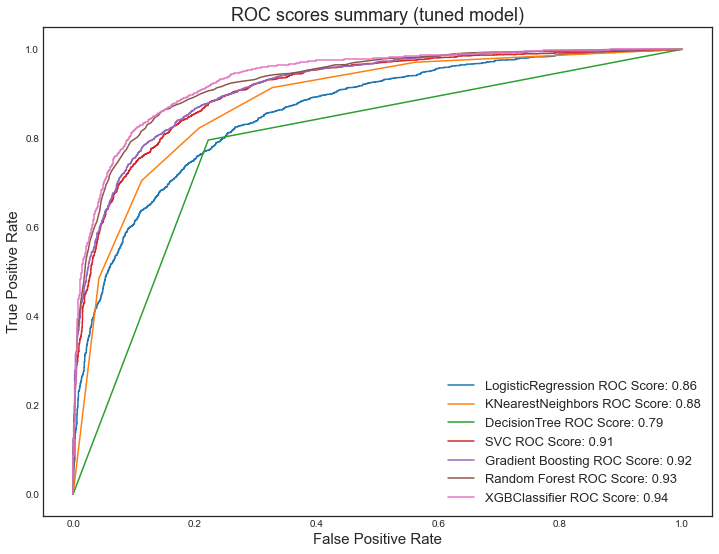

In [77]:
roc_summary_plot(test_y,[lr_prob,knn_prob,dt_prob,svc_prob,gb_prob,rf_prob,xgb_prob],
                 ["LogisticRegression", "KNearestNeighbors", "DecisionTree","SVC","Gradient Boosting","Random Forest", "XGBClassifier"])

In [78]:
table_lr = metric_table(test_y,lr_pred,lr_prob,'LogisticRegression')
table_knn = metric_table(test_y,knn_pred,knn_prob,"KNN")
table_dt = metric_table(test_y,dt_pred,dt_prob,"Decision Tree")
table_svc = metric_table(test_y,svc_pred,svc_prob,"SVC")
table_gb = metric_table(test_y,gb_pred,gb_prob,"Gradient Boosting")
table_rf = metric_table(test_y,knn_pred,knn_prob,"Random Forest")
table_xg = metric_table(test_y,xgb_pred,xgb_prob,"XGBoost")

summary_table = pd.concat([table_lr,table_knn,table_dt,table_svc,table_gb,table_rf,table_xg])

In [79]:
summary_table

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,LogisticRegression,0.767997,0.776476,0.787431,0.777593,0.858020
0,KNN,0.796652,0.807869,0.822860,0.809544,0.881467
0,Decision Tree,0.779430,0.786940,0.795867,0.787563,0.787007
0,SVC,0.830789,0.830264,0.826234,0.828505,0.910936
0,Gradient Boosting,0.832058,0.830682,0.825390,0.828711,0.915918
0,Random Forest,0.796652,0.807869,0.822860,0.809544,0.881467
0,XGBoost,0.853372,0.856844,0.859131,0.856242,0.935600


### Feature Importance

In [80]:
print(rf.feature_importances_)

[0.2279049  0.12449023 0.11763183 0.12563847 0.06009253 0.01409081
 0.02909464 0.02069152 0.10581991 0.10008088 0.07446427]


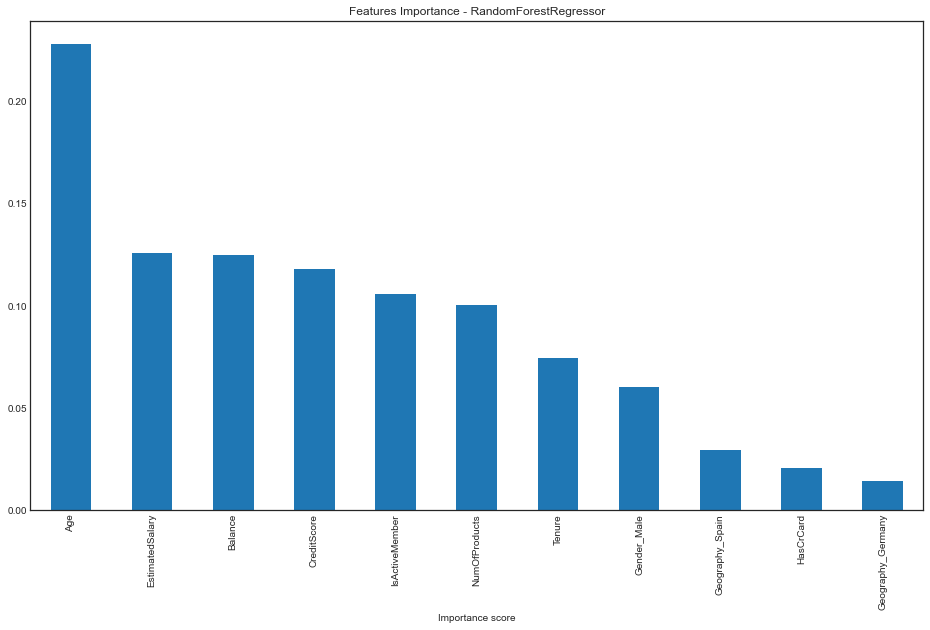

In [81]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
plt.figure(figsize=(16, 9))
feat_importances.nlargest(len(rf.feature_importances_)).plot(kind='bar')
plt.xlabel('Importance score')
plt.title('Features Importance - RandomForestRegressor')
plt.show()

In [82]:
final_df =  feat_importances.nlargest(len(rf.feature_importances_)).index[:8]
final_df


Index(['Age', 'EstimatedSalary', 'Balance', 'CreditScore', 'IsActiveMember',
       'NumOfProducts', 'Tenure', 'Gender_Male'],
      dtype='object')

In [83]:
train_x

,Age,Balance,CreditScore,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
3055,44,115049.150000,812,165038.410000,1,0,0,1,0,2,4
6982,50,0.000000,753,861.400000,0,0,0,1,1,2,4
1853,41,167545.320000,730,128246.810000,0,0,0,1,0,1,4
11276,35,129368.278676,601,8368.825945,0,0,0,0,1,1,1
9358,29,0.000000,837,41866.260000,0,0,0,1,1,2,9
...,...,...,...,...,...,...,...,...,...,...,...
12252,47,122736.210368,699,23.241371,0,1,0,0,0,1,4
1346,30,94443.770000,643,165614.400000,1,0,0,1,1,1,5
11646,44,114153.253910,595,97663.528510,0,1,0,0,0,1,3
15725,53,0.000000,658,149619.704681,0,0,0,1,0,1,2


In [84]:
cv = StratifiedKFold(n_splits=5,random_state=123,shuffle=True)

In [85]:
param_grid = {'n_estimators':np.arange(2,50,2),'max_depth':np.arange(2,50,2)}
grid =GridSearchCV(RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,cv=5,scoring='roc_auc',verbose=True)
grid.fit(train_x_std[final_df],train_y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                         'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])},
             scoring='roc_auc', verbose=True)

In [86]:
grid.best_params_

{'max_depth': 38, 'n_estimators': 46}

In [87]:
test_x[final_df]

,Age,EstimatedSalary,Balance,CreditScore,IsActiveMember,NumOfProducts,Tenure,Gender_Male
8117,34,582.590000,0.00000,624,0,1,6,0
8265,40,160618.610000,140306.38000,618,0,1,0,0
5455,45,189428.750000,116585.97000,805,0,1,9,0
10787,41,185839.429505,142756.51445,719,0,2,3,0
337,33,2010.980000,0.00000,649,0,2,2,1
...,...,...,...,...,...,...,...,...
6625,41,17536.820000,112119.48000,657,0,1,6,0
9921,36,64539.640000,65349.71000,757,0,1,1,1
2141,18,55753.120000,0.00000,674,1,2,7,1
3214,33,19998.310000,68193.72000,572,0,1,9,1


In [88]:
rf = RandomForestClassifier(n_estimators=48,max_depth=24)

In [89]:
rf = rf.fit(train_x_std[final_df],train_y)

In [91]:
new_pred = rf.predict(test_x_std[final_df])
new_prob = rf.predict_proba(test_x_std[final_df])

In [92]:
metric_table(test_y,new_pred,new_prob,"Random Forest")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,Random Forest,0.840488,0.842403,0.842261,0.841373,0.920284


In [93]:

XGB_parameters = {
    'n_estimators': [100, 400],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.20],
    'min_child_weight': [1, 10]}

grid_xg = GridSearchCV(estimator=XGBClassifier(),param_grid=XGB_parameters,cv=5,scoring='roc_auc',verbose=True)

In [94]:
grid_xg = grid_xg.fit(train_x_std[final_df],train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [95]:
grid_xg.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 400}

In [96]:
best_XGB = grid_xg.best_estimator_
best_XGB.fit(train_x[final_df], train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [98]:
xg_pred_new =  best_XGB.predict(test_x[final_df])
xg_prob_new = best_XGB.predict_proba(test_x[final_df])

In [99]:
metric_table(test_y,xg_pred_new,xg_prob_new,"XGBoost")

,model,Precision,Accuracy,Recall,F1-score,ROC_AUC
0,XGBoost,0.840815,0.847007,0.853226,0.846975,0.923753


In [100]:
grid_xg.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
score_1 = metric_table(test_y,new_pred,new_prob,"Random Forest")
score_2 = metric_table(test_y,xg_pred_new,xg_prob_new,"XGBoost")
score = pd.concat([score_1,score_2])

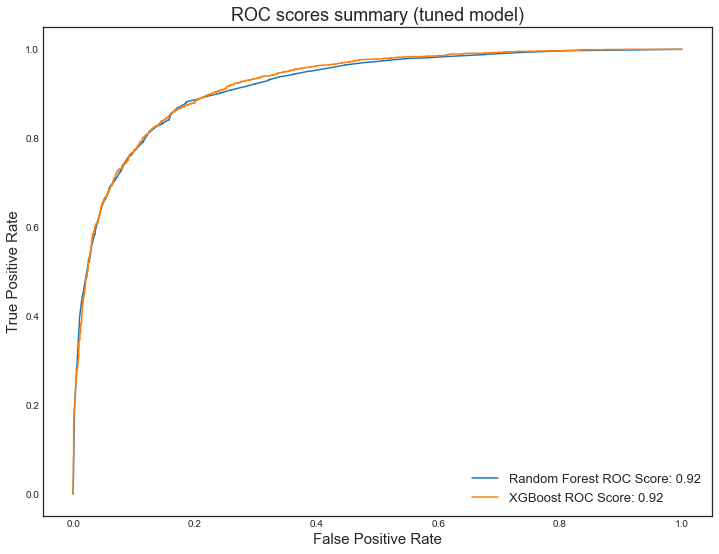

In [102]:
roc_summary_plot(test_y,[new_prob,xg_prob_new],['Random Forest','XGBoost'])

### Interpretations :
    1. Customer of age between 40-60 more leaves the bank.
    2. Female customers are more likely to leave the bank compared to male customers.
    3. Customers who buy more than two products from banks are most likely to churn.
    4. Inactive customers leaves the bank more.This is a sure sign of not sticking with the bank much.
    5. Customers who hold credit card are more likely to churn.Perhaps it may be because of disatifaction with credit card
       features of customer services. 
    6. Customers who have little to no money in their accounts more leaves the bank, and may have churned due to financial 
       difficulties or dissatisfaction with the bank's services. 


#### Predictions were made with a total of 7 classification models. The highest head was taken with XGBoost.       
     Accuracy scores and ROC metric were calculated for each model and results were displayed.
